# Project 1: Processing health and activity data [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

The MMASH dataset [1, 2] is is a dataset of health- and activity-related measurements taken on 22 different people, over a continuous period of 24 hours, using wearable devices.

In this project, we have provided you with some of this data for **10** of those individuals. In the `dataset` folder, you will find:

- a file `subject_info.txt` which summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants,
- 10 folders named `subject_X`, which each contain two files:
    - `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period,
    - `actigraph.txt` contains heart rate and other activity data measured with another device, over the same 24-hour period.

The tasks below will guide you through using your Python skills to process some of this data. Note that the data was reformatted slightly for the purpose of the assignment (to make your life a bit easier!), but the values are all the original ones from the real dataset.

### Getting stuck

Tasks 3 to 8 follow directly from each other. There is a `testing` folder provided for you with `.npy` files and a supplementary `actigraph.txt` dataset. The `.npy` files are NumPy arrays, which you can load directly using `np.load()`, containing an example of what the data should look like after each task. You will be able to use this example data to keep working on the later tasks, even if you get stuck on an earlier task. Look out for the 💾 instructions under each task.

These were produced using the data for another person which is not part of the 10 you have in your dataset.


### References

[1] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). Multilevel Monitoring of Activity and Sleep in Healthy People (version 1.0.0). PhysioNet. https://doi.org/10.13026/cerq-fc86

[2] Rossi, A., Da Pozzo, E., Menicagli, D., Tremolanti, C., Priami, C., Sirbu, A., Clifton, D., Martini, C., & Morelli, D. (2020). A Public Dataset of 24-h Multi-Levels Psycho-Physiological Responses in Young Healthy Adults. Data, 5(4), 91. https://doi.org/10.3390/data5040091.

---
## Task 1: Reading the subject information

The file `subject_info.txt` in your `dataset` folder summarises the age (in years), height (in cm), and weight (in kg) of all 10 study participants.

---
🚩 ***Task 1:*** Write a function `read_subject_info()` which reads in the information in `subject_info.txt`, and returns two outputs:

- a list `headers` containing the four column headers as strings, read from the first line in the file;
- a NumPy array `info` containing the numerical information for each person (i.e. it should have 10 rows and 4 columns).

**Important:** the height of each subject should be given in **metres** in your `info` array.

**[3 marks]**

In [6]:
### library used in this function
import numpy as np

def read_subject_info():
    '''
    Read the information in the "subject_info.txt", and let it represent in the python.
    
    Input:
        x (): empty
    
    Output:
        output (list): four column headers as strings, which is from the first line in the file
               (array): A numpy array which is 10 rows and 4 columns,containing the personal formation.
       
    '''

    ### read the file in python 
    with open('dataset\subject_info.txt','r') as myfile:
    ### read the first line and replace "\n" to empty, and split the information.
        headers = myfile.readline().replace('\n',"").split(",")

    # read other information which skips the first row, in total 4 colums and are all floating number 
        Info = np.loadtxt(myfile,
                      dtype=float,
                      delimiter=',',
                      skiprows=0,
                      usecols=(range(4)))
    # Turns the height in metres
        Info[:,headers.index("Height")]=Info[:,headers.index("Height")]/100
    return(headers,Info)

read_subject_info()

(['Subject', 'Weight', 'Height', 'Age'],
 array([[  1.  ,  95.  ,   1.83,  27.  ],
        [  2.  ,  80.  ,   1.96,  25.  ],
        [  3.  ,  62.  ,   1.78,  27.  ],
        [  4.  ,  65.  ,   1.83,  25.  ],
        [  5.  ,  74.  ,   1.84,  40.  ],
        [  6.  ,  70.  ,   1.75,  20.  ],
        [  7.  , 115.  ,   1.86,  27.  ],
        [  8.  ,  80.  ,   1.8 ,  24.  ],
        [  9.  ,  70.  ,   1.75,  29.  ],
        [ 10.  ,  92.  ,   2.05,  32.  ]]))

---
## Task 2: Charting the Body Mass Index (BMI) for all participants

The Body Mass Index (BMI) can be used to indicate whether someone is at a healthy body weight. [The NHS website](https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/) describes it as follows:

> The body mass index (BMI) is a measure that uses your height and weight to work out if your weight is healthy.
>
> The BMI calculation divides an adult's weight in kilograms by their height in metres, squared. For example, a BMI of $25$ means $25 \text{kg/m}^2$.
>
> For most adults, an ideal BMI is in the $18.5$ to $24.9$ range.

This means that the BMI is calculated as follows:

$$
\text{BMI} = \frac{\text{weight}}{\text{height}^2}.
$$

---
🚩 ***Task 2:*** Write a function `bmi_chart(info)` which takes as input the `info` array returned by `read_subject_info()`, produces a visualisation showing all subjects' heights and weights on a graph, and clearly indicates whether they are within the "healthy weight" range as described above (i.e. their BMI is in the $18.5$ to $24.9$ range).

Your function should not return anything, but calling it with `bmi_chart(info)` must be sufficient to display the visualisation.

You should choose carefully how to lay out your plot so that it is easy to interpret and understand.

**[4 marks]**

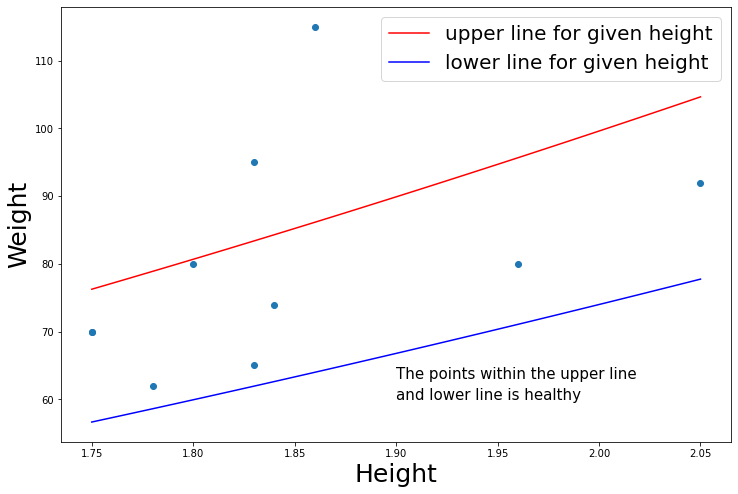

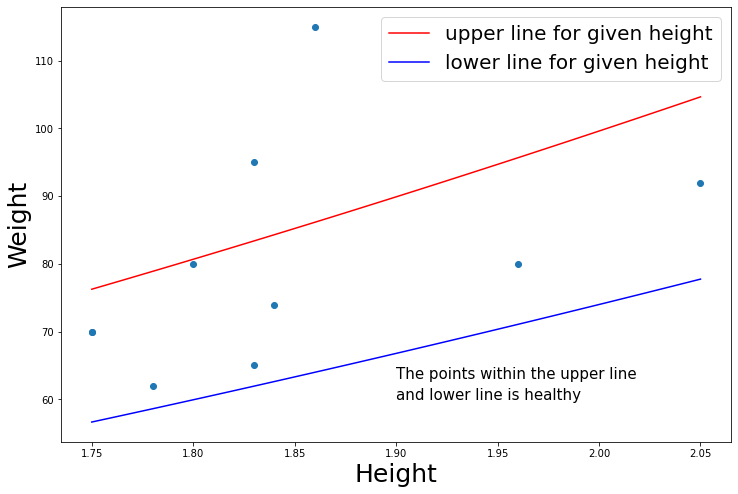

In [37]:
# import two libraries
import numpy as np
import matplotlib.pyplot as plt
# read the personal information
info = read_subject_info()[1]
def bmi_chart(info):
     '''
    Drawing a scatter graph which includes two lines to visualise 
    if each subject is within the healthy weight" range based on the BMI standard

    Input:
        x (array): one of the outputs of the previous function: read_subject_info()
    
    Output:
        output (graph): a scatter plot and two linear lines to show if each subject is healthy or not based
        on the BMI standard. The points (subjects) within two lines are considered healthy.
       
    '''
     # The weight data for each subject
     weight = info[:,1]
     # The height data for each subject
     height = info[:,2]
     # the x-axis of the graph
     x = np.linspace(min(height),max(height),100)
     # some parameters of the plot
     fig, ax = plt.subplots(1, 1, figsize=(12, 8))
     # The data of upper limit shown healthy for each height in BMI standard 
     BMI_upper = 24.9*(x**2)
     # The data of lower limit shown healthy for each height in BMI standard 
     BMI_lower = 18.5*(x**2)
    


     # the linear line of upper limits for each height
     ax.plot(x, BMI_upper, 'red', label="upper line for given height")
     # the linear line of lower limits for each height
     ax.plot(x, BMI_lower, "blue",label="lower line for given height")
     # The scatter of heights and weights for 10 subjects
     plt.scatter(height, weight)
     # Two labels for the graph
     ax.set_xlabel('Height', fontsize=25)
     ax.set_ylabel('Weight', fontsize=25)

     # Legend to show what each line matches with.
     ax.legend(fontsize=20)
     ax.plot()
     ## A statement that The data within two lines are marked healthy. Otherwise, is not.
     plt.text(1.9,63,"The points within the upper line ",color="black",fontsize=15)
     plt.text(1.9,60,"and lower line is healthy",color="black",fontsize=15)
    

    

---
## Task 3: Instantaneous heart rate data

For each subject, the file `heartbeats.txt` contains data on all individual heartbeats detected over the 24-hour study period. Specifically, the two columns record the time at which each heartbeat was detected, and the interval (in seconds) between the current heartbeat and the previous one.

### Handling timestamp data

For the next tasks, you will use NumPy's `datetime64[s]` and `timedelta64[s]` object types, respectively used to represent times (as if read on a clock) and time intervals. You should [consult the relevant documentation](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetimes-and-timedeltas).

Here are a few illustrative examples:

['2022-10-20T00:00:00' '2022-10-23T00:00:00' '2022-10-28T00:00:00']
1814400 seconds
<class 'numpy.timedelta64'>
1814400.0
<class 'numpy.timedelta64'>
21.0


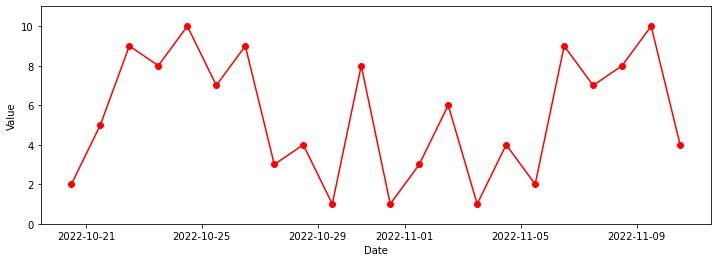

In [8]:
### Some tests are done here
import numpy as np
import matplotlib.pyplot as plt

# Create two datetime objects and a vector of dates
start_time = np.datetime64('2022-10-20 12:00:00')
end_time = np.datetime64('2022-11-10 12:00:00')
time_vector = np.array(['2022-10-20', '2022-10-23', '2022-10-28'], dtype='datetime64[s]')
print(time_vector)

# Get time interval between the two times
time_elapsed = end_time - start_time
print(time_elapsed)
print(type(time_elapsed))

# Divide by the duration of 1 second to get number of seconds (as a number object)
seconds_elapsed = time_elapsed / np.timedelta64(1, 's')
print(seconds_elapsed)
print(type(time_elapsed))
#### 
# Divide by the duration of 1 day to get number of days
days_elapsed = time_elapsed / np.timedelta64(1, 'D')
print(days_elapsed)

# Create a range of datetimes spaced by 1 day
step = np.timedelta64(1, 'D')
days = np.arange(start_time, end_time + step, step) ###应该是和range一样。

# Plot something using days as the x-axis
fig, ax = plt.subplots(figsize=(12, 4))
value = np.random.randint(1, 11, size=len(days))##随机
ax.plot(days, value, 'ro-')
ax.set(ylim=[0, 11], xlabel='Date', ylabel='Value')
plt.show()

---
🚩 ***Task 3a:*** Write a function `read_heartbeat_data(subject)` which takes as input an integer `subject` between 1 and 10, reads the data in `heartbeats.txt` for the given `subject`, and returns it as two NumPy vectors:

- `times`, containing the recorded times of each heartbeat (as `datetime64[s]` objects),
- `intervals`, containing the recorded intervals between heartbeats (in seconds, as `float` numbers).

**[3 marks]**

In [44]:
import numpy as np
def read_heartbeat_data(subject):
    '''
    Read the heartbeats data of the subject, and return two vectors: times(when the hearbeats occur),
    intervals:(how long does it take between two heart beats)

    Input: x(int): A positive integer from 1 to 10, which is the index of the subjects
    output: 
        out(array): times: the recorded times of each heartbeat
                    intervals: the recorded intervals between heartbeats
    '''
    # Check that the input argument is valid
    if subject< 1 or subject > 10:
        raise TypeError('Please enter a positive integer from 1 to 10 .')
    with open('dataset\subject_' + str(subject) +'\heartbeats.txt','r') as myfile:
       ### read a vector
       total_head= myfile.readline().replace("\n","").split(',')
       index_time= total_head.index("Time")
       index_intervals = total_head.index("Interval between heartbeats (s)")
       ### info read the data array
       Info = np.loadtxt(myfile,
                      dtype=str,
                      delimiter=',',
                      skiprows=0)
       # Time data for each heartbeats
       Time = Info[:,index_time]
       # Interval data between two hearbeats
       interval = Info[:,index_intervals]
       # Change the type of times to datetime64
       times = Time.astype(np.datetime64)
       # Change the type of intervals to float
       intervals = interval.astype(float)
    
       return(times,intervals)
    
       

#read_heartbeat_data(1)

(array(['2022-07-22T10:03:18', '2022-07-22T10:03:19',
        '2022-07-22T10:03:19', ..., '2022-07-23T09:45:07',
        '2022-07-23T09:45:07', '2022-07-23T09:45:07'],
       dtype='datetime64[s]'),
 array([6.512, 0.453, 0.374, ..., 0.342, 0.327, 0.269]))

---
🚩 ***Task 3b:*** Write a function `hr_from_intervals(intervals)` which takes as input a NumPy vector containing heartbeat interval data (such as that returned by `read_heartbeat_data()`), and returns a NumPy vector of the same length, containing the instantaneous heart rates, in **beats per minute (BPM)**, calculated from the intervals between heartbeats. You should return the heart rates as floating-point numbers.

For instance, an interval of 1 second between heartbeats should correspond to a heart rate of 60 BPM.

**[2 marks]**

In [45]:
# Import the library
import numpy as np

def hr_from_intervals(intervals):
    '''
    Change the intervals data between two heart beats to BPM data

    Input: x(array): intervals from the function "read_heartbeat_data"

    output: 
        out(array): Numpy array of BPM data which is floating-point numbers
    '''
    # Convert intervals to BPM
    BPM = np.array(60/intervals)

    return(BPM)

    

array([  2.76523182, 219.78021978, 147.42014742, ..., 125.26096033,
       126.05042017, 127.38853503])

---
## Task 4: Data cleaning

There are gaps and measurement errors in the heartbeat data provided by the device. These errors will likely appear as outliers in the data, which we will now try to remove.

One possible method is to remove data points which correspond to values above and below certain **percentiles** of the data. Removing the data below the $p$th percentile means removing the $p\%$ lowest values in the dataset. (Note that, for instance, the 50th percentile is the median.)

---
🚩 ***Task 4a:*** Write a function `clean_data(times_raw, hr_raw, prc_low, prc_high)` which takes 4 inputs:

- `times_raw` is the NumPy array of timestamps returned by `read_heartbeat_data()`,
- `hr_raw` is the NumPy array of computed heart rate values returned by `hr_from_intervals()`,
- `prc_low` and `prc_high` are two numbers such that $0\leq$ `prc_low` $<$ `prc_high` $\leq 100$.

Your function should return two NumPy arrays of the same length, `times` and `hr`, which are the original arrays `times_raw` and `hr_raw` where all the measurements (heart rate and associated time stamp) below the `prc_low`th percentile and above the `prc_high`th percentile of the heart rate data have been removed.

You may wish to make use of NumPy functionality to calculate percentiles.

**[4 marks]**

In [47]:

# Import library
import numpy as np

# intervals = read_heartbeat_data(1)[1]
# times_raw = read_heartbeat_data(1)[0]
# hr_raw = hr_from_intervals(intervals)

def clean_data(times_raw, hr_raw, prc_low, prc_high):
    '''
    taking the outliers out from two data sets(corresponding to each other) based on the percentile locations
    set

    Input: times_raw(NumPy array): The time data of timestamps returned by read_heartbeat_data()
           hr_raw (NumPy array): The computed heart rate values returned by hr_from_intervals()
           prc_low ,prc_high(int): percentile level in two sides.

    output: times(Numpy array): The rest of times data removed the part below the prc_low 
    and the part above the prc_high
            hr(Numpy array):  The rest of heart beats data removed the part below the prc_low 
    and the part above the prc_high.    
    '''
    # get two numbers of limits based on prc_low and prc_high 
    limits = np.percentile(hr_raw,(prc_low,prc_high))
    # Removed the outlier from hr_raw by using comprehensions.
    hr = np.array([x for x in hr_raw if x>=limits[0] and x<=limits[1]])
    # Removed the outlier from times_raw by using comprehensions.
    times = np.array([times_raw[x] for x in range(len(times_raw)) if hr_raw[x]>=limits[0] and hr_raw[x]<=limits[1] ])
    #time_ad = times_raw.index(hr_ad)

    return(hr,times)


---
🚩 ***Task 4b:*** Write a function `evaluate_cleaning(subject)`, which takes as input an integer `subject` between 1 and 10 indicating the subject number, and plots the following two histograms for that subject:

- a histogram of the raw heart rate data,
- a histogram of the heart rate data after cleaning with `clean_data()`, where the bottom 1% and the top 1% of the values have been removed.

Your histograms should use a logarithmic scale on the y-axis, and be clearly labelled. You should consider carefully how to lay out the histogram to best present the information.

Your function `evaluate_cleaning()` should call the functions `read_heartbeat_data()`, `hr_from_intervals()`, and `clean_data()` you wrote above, in order to obtain the raw and cleaned heart rate data for a given `subject`.

Then, use your function to display the histograms of the raw and cleaned data for Subject 3. Given that heart rates in adults can typically range from about 40 to 160 beats per minute, and given your histograms, explain why this is a suitable method to remove likely measurement errors in the heart rate data.

**[3 marks]**

---

💾 *If you are stuck on Task 3 or on the task above, you can load the data provided in the `testing` folder to produce your histograms, by running the following commands:*

```python
times_raw = np.load('testing/times_raw.npy')
hr_raw = np.load('testing/hr_raw.npy')
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

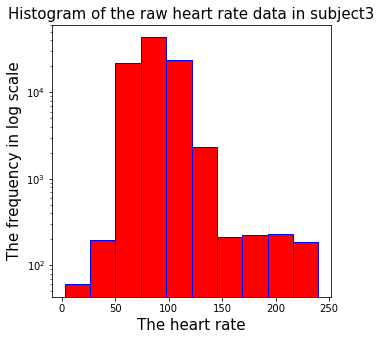

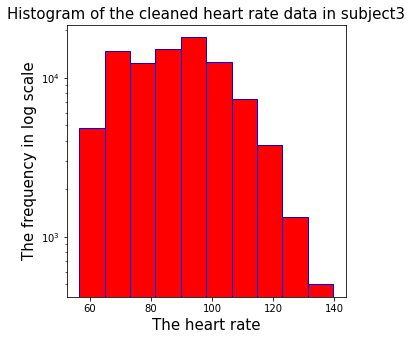

In [120]:
import matplotlib.pyplot as plt
def evaluate_cleaning(subject):
    '''
    Two histograms are drawed, they shows the raw heart rate and cleaned heart rate data for the subject inputed
    
    Input: x(int): A positive integer from 1 to 10, which is the index of the subjects
    output: 
        out(histograms): a histogram of the raw heart rate data
                    a histogram of cleaning heart rate data ,where the 1% of the extreme values 
                    on both sides are removed
     
    '''
    #Check if the input is valid
    if subject< 1 or subject > 10:
        raise TypeError('Please enter a positive integer from 1 to 10 .')
    # Call the previous functions to get the data
    intervals = read_heartbeat_data(subject)[1]
    data_represent= hr_from_intervals(intervals)
    # The exact number of 1% percentile of the data on both sides are conducted
    limits_1_percent = np.percentile(data_represent,(1,99))
    # extract the clean data by using comprehension. 
    clean_data_represent = np.array([i for i in data_represent if i>=limits_1_percent[0] and i<=limits_1_percent[1]])
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    fig, bx = plt.subplots(1, 1, figsize=(5, 5))
    ## Labelling the y-axis that the y-axis is showed in terms of the log number.
    ax.set_yscale("log")
    bx.set_yscale("log")
    # Some settings of the histograms, we let the fontsize be 15
    ax.set_xlabel("The heart rate",fontsize=15)
    ax.set_ylabel("The frequency in log scale",fontsize=15)
    bx.set_xlabel("The heart rate",fontsize=15)
    bx.set_ylabel("The frequency in log scale",fontsize=15)
    # Setting different titles for each of histograms.
    ax.set_title(f"Histogram of the raw heart rate data in subject{subject}",fontsize=15)
    bx.set_title(f"Histogram of the cleaned heart rate data in subject{subject}",fontsize=15)
    # Drawing the histograms, divided the each column in color of blue. 
    ax.hist(data_represent,color="red",ec="blue")
    bx.hist(clean_data_represent,color="red",ec="blue")
    # Showing the histograms to us.
    plt.show()
# Providing a example 
evaluate_cleaning(3)

#### Explaning is written below two histograms.
    

In [51]:
# Explaining : From the two histograms provided above, we notice that the heart rate(x) scale of first histograms 
#              represented the raw data is from 0 to 250, and the heart rate scale of cleaned data is from 60
#              to 140, that's because the heart rate which is less than 60 and higher than 140 are both outliers
#              in 1% percentile scale, and they are removed, so the histograms showing the clean data set 
#              is much more close the reality, and this is a good way to remove likely measurement 
#              errors in the heart rate data. 


*Use this Markdown cell to write your explanation for Task 4.*

---
## Task 5: Interpolating the data

Although the device detecting heartbeats was able to measure intervals between beats with millisecond precision, the recorded timestamps could only record the second at which a heartbeat occurred. This means that there are not only time gaps in the data (due to the device missing heartbeats), but also several heartbeats usually recorded in the same second.

For example, this is an excerpt from Subject 7's data, showing a 9-second time gap between `09:19:57` and `09:20:06`, as well as 3 different heartbeats detected at `09:20:06`:

```
59,2022-07-21 09:19:56,1.033
60,2022-07-21 09:19:57,0.942
61,2022-07-21 09:20:06,0.307
62,2022-07-21 09:20:06,0.439
63,2022-07-21 09:20:06,0.297
64,2022-07-21 09:20:07,0.427
```

The goal of this next task is to **interpolate** the recorded data, in order to produce a new dataset containing values of the heart rate at regular time intervals. We will use **linear interpolation**, with the help of SciPy's `interp1d()` function (from the `interpolate` module) which we saw in Week 5.

---
🚩 ***Task 5a:*** The `interp1d()` function from SciPy can only be used with numeric data, and not timestamps. Two functions are provided for you below.

- Explain, in your own words, what both functions do and how.
- Write a few lines of test code which clearly demonstrate how the functions work.

**[2 marks]**

In [67]:



def datetime_to_seconds(times):
    '''
    Change the initial starting time from real time to the time when first record started.
    Input: times(numpy.ndarray): A long time
    Output: (numpy.ndarray): A long time from new the first time recorded
    '''
    return (times - times[0]) / np.timedelta64(1, 's')
### lift a example to show it. Some previous data are called
intervals = read_heartbeat_data(3)[1]
times_raw = read_heartbeat_data(3)[0]
hr_raw = hr_from_intervals(intervals)
clean_times= clean_data(times_raw,hr_raw,1,99)[1]
# The initial data
print(clean_times)
# The data which is converted by datetime_to_seconds function
print(datetime_to_seconds(clean_times))

#The function "seconds_to_datetime(seconds_elapsed, start_time)" adds a start time to a list of time given by us

def seconds_to_datetime(seconds_elapsed, start_time):
    '''
    Add start_time to each elements of second_elapsed, to let records starts from the start_time
    Input: seconds_elapsed(numpy.ndarray): A long time
    Output: (numpy.ndarray): A long time added start_time on each element 
    '''
    return seconds_elapsed * np.timedelta64(1, 's') + start_time

.
seconds_to_datetime(datetime_to_seconds(clean_times),50)





['2022-07-13T10:18:59' '2022-07-13T10:19:00' '2022-07-13T10:19:01' ...
 '2022-07-14T10:08:21' '2022-07-14T10:08:21' '2022-07-14T10:08:22']
[0.0000e+00 1.0000e+00 2.0000e+00 ... 8.5762e+04 8.5762e+04 8.5763e+04]


array([   50,    51,    52, ..., 85812, 85812, 85813],
      dtype='timedelta64[s]')

*Use this Markdown cell to explain how the functions `datetime_to_seconds()` and `seconds_to_datetime()` work.*

 The function "datetime_to_seconds(times)" convert the initial type of representing time like 
'2022-07-13T10:18:59' to a new time starting from the first time recorded, by using "times - times[0]",
 the type is numpy timedelta64 in 1 second.
 A example from function "datetime_to_seconds(times)", the example is from the previous one.Their difference
 is straightforward

---
🚩 ***Task 5b:*** Write a function `generate_interpolated_hr(times, hr, time_delta)` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object representing a time interval in seconds,

and returns two new NumPy vectors, `times_interp` and `hr_interp`, such that:

- `times_interp` contains regularly spaced `datetime64[s]` timestamps, starting at `times[0]`, ending on or less than `time_delta` seconds before `times[-1]`, and with an interval of `time_delta` between consecutive times.
- `hr_interp` contains the heart rate data obtained using **linear interpolation** and evaluated at each time in `times_interp`, for example with the help of the `interp1d()` function from `scipy.interpolate`.

For example, if `times` starts at `10:20:00` and ends at `10:20:09` with a `time_delta` of two seconds, then your `times_interp` vector should contain `10:20:00`, `10:20:02`, `10:20:04`, `10:20:06`, `10:20:08`, and `hr_interp` should consist of the corresponding interpolated heart rate values at each of those times.

**[4 marks]**

In [76]:
# Import the libraries used below
from scipy.interpolate import interp1d
import scipy as scp

###times and hr are cleaned data
# times = clean_times
# hr = clean_hr
def generate_interpolated_hr(times, hr, time_delta):
    '''
    Generating interpolated new list of hr to match the new times list whose gap is time_delta 
    between two elements

    Input: times(numpy.ndarray): cleaned times
           hr(numpy.ndarray):cleaned hr corresponded to cleaned times
           time_delta(int): The time gap we want
    Output: times_interp(numpy.ndarray): The interpolated time based on time_delta
           hr_interp(numpy.ndarray): The interpolated hr corresponded to time_interp

    '''
    ####output: 均匀时间sequence：times_interp,间隔为delta
    ##########  按照时间 篡改的 hr
    # The both sides(extreme value) of this times input
    times_min, times_max = times[0], times[-1]
    ## Interpolating the time data, the gap is time_delta
    times_interp = np.arange(times_min, times_max + 1, time_delta)

    ### using the library to interpolate the times and hr in linear relationship,it's quite like a regression model
    #  and the times is converted to start from 0
    hr_interp1 = scp.interpolate.interp1d(datetime_to_seconds(times), hr, kind='linear')
    ### get interpolated hr from interpolated time based on builtin function in library
    hr_interp = hr_interp1(datetime_to_seconds(times_interp))
    return times_interp,hr_interp


---
🚩 ***Task 5c:*** Check your `generate_interpolated_hr()` function by generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning). You should generate interpolated data with a time interval of 5 seconds. Plot the data points, as well as your interpolated data, and discuss in the Markdown cell below whether your plot is what you expected, and why.

**[2 marks]**

---
💾 *If you are stuck on Task 4, you can use the cleaned data provided in the `testing` folder to check your code, by running the following commands:*

```python
times = np.load('testing/times.npy')
hr = np.load('testing/hr.npy')
```

[]

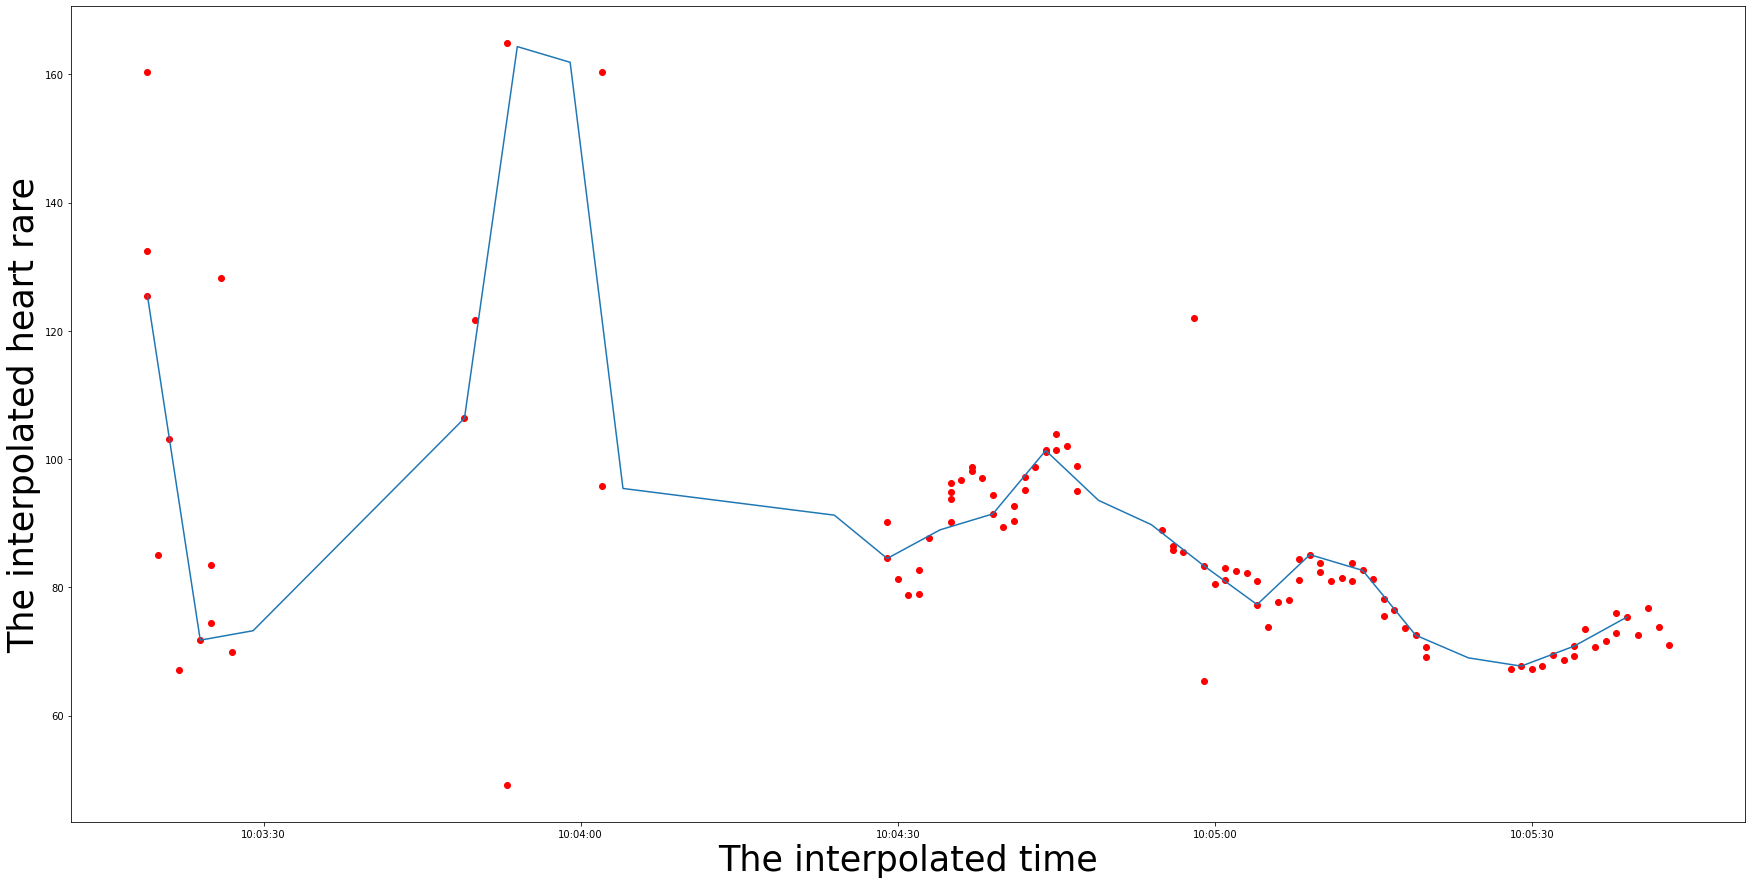

In [91]:
import matplotlib.pyplot as plt
### previous functions are called to obtain the data of subject 1
intervals = read_heartbeat_data(1)[1]
times_raw = read_heartbeat_data(1)[0]
hr_raw = hr_from_intervals(intervals)
## Getting cleaned times and hr
times=clean_data(times_raw,hr_raw,1,99)[1]
hr=clean_data(times_raw,hr_raw,1,99)[0]

# generating interpolated heart rate data for Subject 1 for just the first 100 measurements (after cleaning)
# Time delta is 5 seconds
times_interp_draw=generate_interpolated_hr(times[:100], hr[:100], 5)
#hr_interp_draw = generate_interpolated_hr(times[:100], hr[], 5)[1][0:100]
#clean_data(times_raw,hr_raw,10,90)
# times= clean_data(times_raw,hr_raw,1,99)[1][0:100]
# hr= clean_data(times_raw,hr_raw,1,99)[0][0:100]
#hr_interpolated_100=generate_interpolated_hr(times, hr, 5)[1]
#plt.set_
# Plot the figure.
f = plt.figure()
# Some settings of the graph 
f.set_figwidth(30)
f.set_figheight(15)
plt.xlabel("The interpolated time",fontsize=35)
plt.ylabel("The interpolated heart rare",fontsize=35)

### The line graph of the interpolated data
plt.plot(times_interp_draw[0],times_interp_draw[1])

## The scatter of the first 100 real cleaned data in colour of red.
plt.scatter(times[:100], hr[:100],c="red")
# Plot both of them
plt.plot()



*Use this Markdown cell for discussing your interpolation results.*

#The graph is not what I expect, I ignore the data distribution in this period, you can see there are little points from 10:03:30 to 10:04:30, and many data points from 10:03:30 to 10:05:30. which cause the line is changing dramatically before 10:04:30, and this is not accurate due to the lack of enough data. 

---
## Task 6: Smoothing the data with a rolling average

A rolling average is simply an average of the heart rate data, calculated over a given window of time. For example:

- The 20-second rolling average of the heart rate at a time `10:20:00` is the average heart rate over the 20 seconds leading up to that time, i.e. the average of all the heart rates between `10:19:41` and `10:20:00` (inclusive). If we have measurements of the heart rate every 5 seconds, then this would be the average of the heart rates measured at `10:19:45`, `10:19:50`, `10:19:55`, and `10:20:00`.
- We can similarly calculate the 20-second rolling average at the next measurement time, `10:20:05`, as the average heart rate over the 20-second period from `10:19:46` to `10:20:05` (inclusive).

The rolling average essentially smoothes out the sudden jumps in the measured (or interpolated) heart rate data, allowing us to see the longer-term variations more clearly.

---
🚩 ***Task 6:*** Write a function `rolling_average()` which takes as inputs:

- two NumPy vectors `times` and `hr` such as those returned by `clean_data()`,
- a `timedelta64[s]` object `time_delta` representing a time interval in seconds,
- a `timedelta64[s]` object `window`, representing the window duration in seconds (with `window` assumed to be an integer multiple of `time_delta`),

and returns a NumPy vector `hr_rolling` containing values for the rolling average of the heart rate over time, with the given window size.

Your `rolling_average()` function should call `generate_interpolated_hr()` to generate regularly-spaced heart rate data with a time interval `time_delta`, before computing and returning the averaged heart rate data.

Note that `hr_rolling` will be shorter than the length of your interpolated heart rate data, because you can only start computing rolling averages after one window of time has elapsed. (For instance, if your data starts at `10:20:00`, with a 30-second window, the first value of the rolling average you can obtain is at `10:20:29`.)

**[4 marks]**

In [94]:
#times= clean_data(times_raw,hr_raw,1,99)[1]
#hr= clean_data(times_raw,hr_raw,1,99)[0]
# Time_interval in seconds,时间间隔
# window = n*Time_interval
#output:
############# Calling previous function to obtain the data
intervals = read_heartbeat_data(3)[1]
times_raw = read_heartbeat_data(3)[0]
hr_raw = hr_from_intervals(intervals)
times=clean_data(times_raw,hr_raw,1,99)[1]
hr=clean_data(times_raw,hr_raw,1,99)[0]
# import library
import numpy as np
def rolling_average(times, hr, time_delta, window):
    '''
    Getting rolling averages of times and hr respectively from cleaned data, based on time_delta and window
    This method is used for observing long-term variation.
    Input:times(numpy.ndarray): cleaned time data from previous function
          hr(numpy.ndarray): cleaned hr data corresponded to times 
          time_delta(int): time interval
          window(int): window duration in seconds, it's integer multiple of time_delta
    Output: hr_rolling(numpy.ndarray):The mean hr in each window time
            times_rolling(numpy.ndarray):A part of interpolated times, it starts from the first window time 
    '''
    ### The multiple between window duration and time_delta
    multiple = int(window/time_delta)
    # Getting interpolated data from previous function
    hr_interp = generate_interpolated_hr(times,hr,time_delta)[1]
    time_interp = generate_interpolated_hr(times,hr,time_delta)[0]
    # Rolling time starting sfrom the first window time
    times_rolling=time_interp[multiple:]
    # A empty list, using a for loop to fill with the rolling average hr.
    hr_rolling=[]
    # From here, we can easily notice that hr_rolling is shorter than hr_interp.
    for i in range(int(len(times_rolling))):
       hr_rolling.append(np.mean(hr_interp[i:i+multiple]))
    
    return(hr_rolling,times_rolling)
    
    

([65.9406026394799,
  65.95471890812661,
  66.17321689769396,
  66.09649287400717,
  66.00702762060749,
  66.82628005276314,
  66.3881560852274,
  66.02166244168276,
  67.10115617741721,
  67.11533388792962,
  66.78544238000987,
  66.51036416431344,
  65.97104423724176,
  65.88938241924555,
  66.024563948728,
  64.99107449251935,
  65.39862490006976,
  65.54980009826676,
  64.31567934223365,
  64.87066891690866,
  67.13660666972451,
  68.8844760695118,
  70.44349412854791,
  71.81366084683276,
  72.5731918548705,
  72.8690906969197,
  72.22231357356418,
  72.63208750128825,
  72.9902793488418,
  73.04081793575483,
  71.88938378339542,
  71.81750190117039,
  70.57015139121192,
  69.27502074796314,
  68.47519146926064,
  68.10492936266411,
  68.69137830069147,
  68.76156266624673,
  68.07962049494286,
  67.97101776650814,
  68.79082753113386,
  67.17116790883296,
  67.66569901874865,
  68.72450794593797,
  69.80122378260742,
  70.89584652875703,
  70.87350027101033,
  70.32467233266473,


---
## Task 7: Putting it all together

You should now have a series of functions which allow you to:

- read data on measured heartbeart-to-heartbeat intervals for a given subject,
- transform this data into heart rate measurements and clean out the outliers,
- interpolate the data to generate measurements at regular time intervals,
- compute a rolling average of the heart rate data over time, to smooth out the data.

For each subject, there is another file `actigraph.txt`, containing activity data recorded by a separate device. In particular, this data provides another independent measurement of the subjects' heart rate. We can use this to check our work.

---
🚩 ***Task 7:*** Write a function `display_heart_rate(subject)` which takes as input an integer `subject` between 1 and 10, and produces one single graph, containing two plots on the same set of axes:

- a plot of the heart rate data found in `actigraph.txt` over time,
- a plot of the smoothed heart rate data computed by you from the data in `heartbeats.txt`, using interpolated measurements of the heart rate every 3 seconds, and a 30-second window size for the averaging.

Your plot should show good agreement between the two sets of data. Instead of showing the full 24 hours of data, you should choose a period of time over which to plot the heart rate (say, approximately 1 hour), in order to better visualise the results.

Show an example by using your function to display the results for 3 subjects of your choice.

**[4 marks]**

---
💾 *If you are stuck on Task 5 or 6, you can use the actigraph heart rate data provided in the `testing` folder in `actigraph.txt`, and compare this to the smoothed heart rate data provided in the `testing` folder, which you can load by running the following command:*

```python
hr_rolling = np.load('testing/hr_rolling.npy')
```

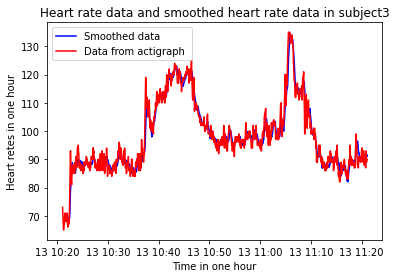

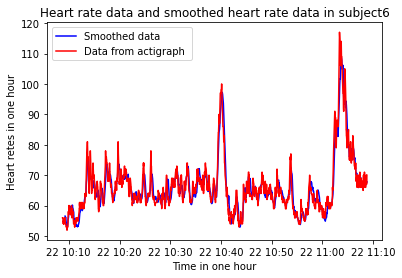

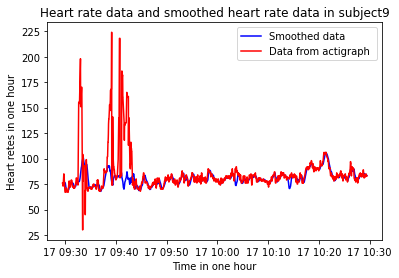

In [118]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
def display_heart_rate(subject):
    '''
    Drawing two plots in the same graph, the first plot is the new heart rate data from "actigraph.txt" 
    over time, and the second one is the smoothed heart rate data from "heartbeats.txt", and the data is
    conducted by previous functions.time_delta is 3 and window duration is 30
    Input: x(int):the index of subject
    Output: Out(graphs): first: new heart rate data from "actigraph.txt" over time
                         second:the smoothed heart rate data conducted from previous functions
                         from "heartbeats.txt"
    '''

    # check if input is valid
    if subject< 1 or subject > 10:
       raise TypeError('Please enter a positive integer from 1 to 10 .')
    ### open the new file like we did in previous questions
    with open('dataset\subject_' + str(subject) +'\\actigraph.txt','r') as myfile:
        headers = myfile.readline().replace('\n',"").split(",")
        
        Info = np.loadtxt(myfile,dtype=str,delimiter=',',skiprows=1)
        # BPM data is listed in the 2nd column
        BPM_new = Info[:,2]
        # change its type to float
        BPM_new=BPM_new.astype(float)
        # Time data is listed in the 1st column
        All_time = Info[:,1]
        # change its type to np.datetime64
        All_time = All_time.astype(np.datetime64)

        # Setting up a starting time, 100 is set by me.
        start_time = All_time[100]
        # change its type to np.datetime64
        start_time=start_time.astype(np.datetime64)
        # end_time is one hour latter of the start time
        end_time = All_time[100] + np.timedelta64(1,"h")
        # Extract the data within the start_time and end_time
        BPM_want = BPM_new[(All_time >= start_time) & (All_time <= end_time)]
        times_want = All_time[(All_time >= start_time) & (All_time <= end_time)]
        
        # Read the data from previous functions
        intervals = read_heartbeat_data(subject)[1]
        times_raw = read_heartbeat_data(subject)[0]
        hr_raw = hr_from_intervals(intervals)
        times=clean_data(times_raw,hr_raw,1,99)[1]
        hr=clean_data(times_raw,hr_raw,1,99)[0]

        # Extract the data within the start_time and end_time
        time_here = times[(times>=start_time)&(times<=end_time)]
        hr_here = hr[(times>=start_time)&(times<=end_time)]
        # Smoothing the hr by setting time_delta is 3 and window duration 30
        hr_smoothed = rolling_average(time_here,hr_here,3,30)[0]
        # We tick the first window/time_delta (30/3) time
        times_smoothes = generate_interpolated_hr(time_here,hr_here,3)[0][10:]
        # Some settings of the graph
        plt.title(f'Heart rate data and smoothed heart rate data in subject{subject}')
        plt.xlabel("Time in one hour")
        plt.ylabel("Heart retes in one hour")

        # Plotting the line with its own label 
        plt.plot(times_smoothes,hr_smoothed,"blue",label="Smoothed data")
        plt.plot(times_want,BPM_want,"red",label="Data from actigraph ")
       
        # add legend
        plt.legend()
        plt.show()
        

        

        

## show three examples.
display_heart_rate(3)
display_heart_rate(6)
display_heart_rate(9)

    #

---
## Task 8: relating to other data

The data in `actigraph.txt` also contains the following columns:

- `Steps` indicates the number of steps detected per second (using a pedometer).
- `Inclinometer Standing`/`Sitting`/`Lying` indicates the position of the subject, automatically detected by the device.
- `Inclinometer Off` indicates when the device didn't record a position.

In particular, the `Inclinometer ...` columns record either `0` or `1`, and they are mutually exclusive over each row. This means that, for example, a subject can't be recorded simultaneously sitting and standing.

---
🚩 ***Task 8:*** Using the results of your data processing work in previous tasks, can you relate some of this additional data (and/or some of the data in `subject_info.txt`) to the heart rate estimates that you have obtained?

You are free to choose how you complete this task. You will be assessed on the correctness of your code and analysis, the quality of your code (readability, commenting/documentation, structure), and the presentation of your results.

Note that you do not have to use **all** of the extra data to obtain full marks.

**[5 marks]**

---
💾 *If you are using `hr_rolling.npy` and the actigraph data in the `testing` folder, this is the information for this person:*

| Weight | Height | Age |
|:-:|:-:|:-:|
| 85 | 180 | 27 |